In [57]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [66]:
text_list = read_text_folder("./data/")
print("document number:", len(text_list))

document number: 5


In [67]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [68]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('知名', 1),
 ('小提琴家', 2),
 ('馮楚軒', 3),
 ('10', 2),
 ('日', 2),
 ('在', 7),
 ('台', 1),
 ('東國慶', 1),
 ('煙火', 2)]

In [69]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\Anita\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,遇到,還說,一半,力挺,成員,不滿,於,重覆,眼眶,這件,...,稱團隊,身分,文怒,台幣,大學,隨後,個,慶祝,嗎,這些
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0


In [70]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,遇到,還說,一半,力挺,成員,不滿,於,重覆,眼眶,這件,...,稱團隊,身分,文怒,台幣,大學,隨後,個,慶祝,嗎,這些
0,0.037780,0.000000,0.056412,0.000000,0.045513,0.000000,0.000000,0.031781,0.000000,0.000000,...,0.056412,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.037780,0.0000,0.000000
1,0.037705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0563,0.000000,0.000000,0.000000,0.0563,0.000000,0.0563,0.000000
2,0.048712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040978,0.000000,0.058683,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.072736
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.059712,0.048175,0.033641,0.059712,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.039990,0.0000,0.000000
4,0.000000,0.044194,0.000000,0.044194,0.035655,0.000000,0.035655,0.024898,0.000000,0.035655,...,0.000000,0.044194,0.0000,0.088387,0.044194,0.044194,0.0000,0.029597,0.0000,0.000000


In [71]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('遇到', 1.0),
 ('還說', 0.0),
 ('一半', 1.0),
 ('力挺', 0.0),
 ('成員', 1.0),
 ('不滿', 0.0),
 ('於', 0.0),
 ('重覆', 1.0),
 ('眼眶', 0.0),
 ('這件', 0.0)]

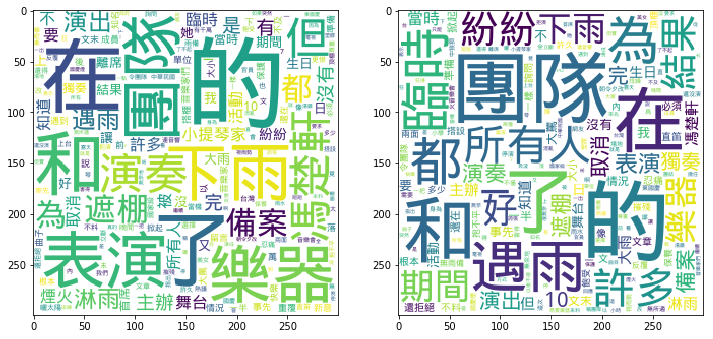

In [72]:
linux_font = r'wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

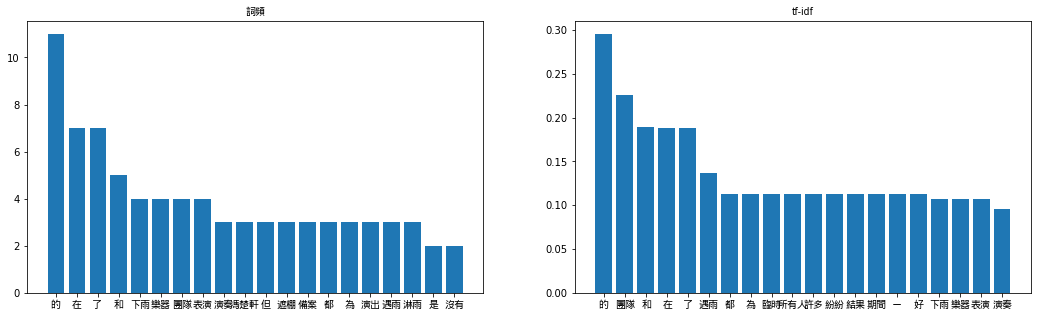

In [73]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")